In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [116]:
single_dkl = open("single_dkl.txt","r")
total_dkl = open("total_dkl.txt", "r")
lines1 = single_dkl.readlines()[2 : ]
lines2 = total_dkl.readlines()[2 : ]  

lines3 = []
for i in range(20,295,25):
    picture = open("single_contribs_step" + str(i) + ".txt", "r")
    lines3.append(picture.readlines()[ : -1]  )

In [117]:
print(lines3[0][0], "\n", lines[-1])

[0.011425608109832553, 0.019246487744497477, 0.04438100917128673, 0.10806011449130346, 0.0016778315683610486, 0.036967490889248306, 0.055092936989170456, 0.12576053489797287, 0.05316874002496327, 0.004189787501129525, 0.03161266942201044, 0.13434354768080858, 0.07411678304052882, 0.0016703838265255191, 0.003596594275536247, 0.12893672233641615, 0.04097378612778251, 0.014524046234457515, 0.017301503129559588, 0.0011322724257803365, 0.0011961217098038952, 0.0018041084287881912, 0.003306106331694742, 0.0011961217098038952, 0.007664051637463995]
 
 [7.328493344377525e-5, 0.00029459240375247567, 0.00023354105432935946, 0.002517978234426916, 0.0014071090742892572, 1.4015621719251094e-7, 2.1985613709802135e-5, 0.00015897541490417916, 0.000780995751563659, 3.185110246087708e-6, 0.0019520289319995571, 0.0010087675798818281, 0.0005463733330472731, 0.004154684368043261, 0.0007136893902741845, 0.0009344275566447414, 4.490790230723637e-6, 0.00046284859961411105, 0.0032177739027589077, 0.00029690113

In [118]:
def str2array_for_matrices(lines, every_five=False):
    x = []
    for line in lines[0:-1]:
        line = line[1:-2]
        line = line.split(", ")
        for i in range(0,len(line)):
            line[i] = float(line[i])
        x.append(line)

    if every_five == False:
        last_line = lines[-1][1:-1].split(", ")
        for i in range(0,len(last_line)):
            last_line[i] = float(last_line[i])
        x.append(last_line)
        return x
    else:
        last_line = lines[-1][1:-2].split(", ")
        for i in range(0,len(last_line)):
            last_line[i] = float(last_line[i])
        x.append(last_line)
        return x

 
def str2array_for_full(lines):
    y = []
    for line in lines:
        y.append(float(line))
    return y

def dkl_ave(dkls):
    tot = 0
    for dkl in dkls:
        #print("dkl ", dkl)
        fi = np.sort(dkl) / sum(dkl)
        tot += fi
    tot /= len(dkls)
    return tot

In [122]:
all_steps_single_dkl = str2array_for_matrices(lines1)
all_steps_full_dkl = str2array_for_full(lines2)

every_five_single_dkl = []
for five_lines in lines3:
    every_five_single_dkl.append(str2array_for_matrices(five_lines, every_five=True))

all_steps_sum_single_dkl = []
for i in all_steps_single_dkl:
    all_steps_sum_single_dkl.append(sum(i))

In [123]:
len(all_steps_single_dkl), len(all_steps_full_dkl), len(every_five_single_dkl)

(284, 284, 11)

### Correlations:

Text(0, 0.5, 'sum of singles')

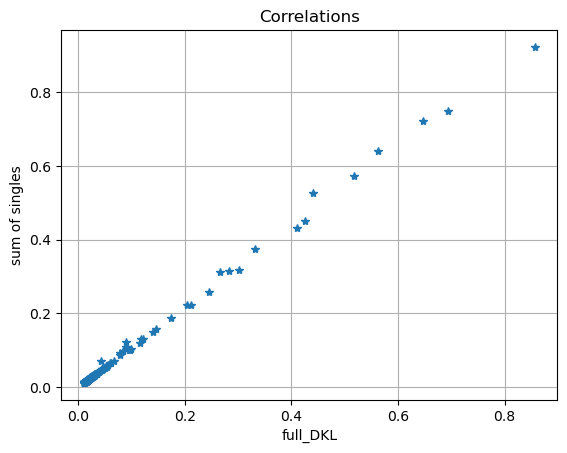

In [124]:
plt.plot(all_steps_full_dkl, all_steps_sum_single_dkl, "*")
plt.grid("True")
plt.title("Correlations")
plt.xlabel("full_DKL")
plt.ylabel("sum of singles")

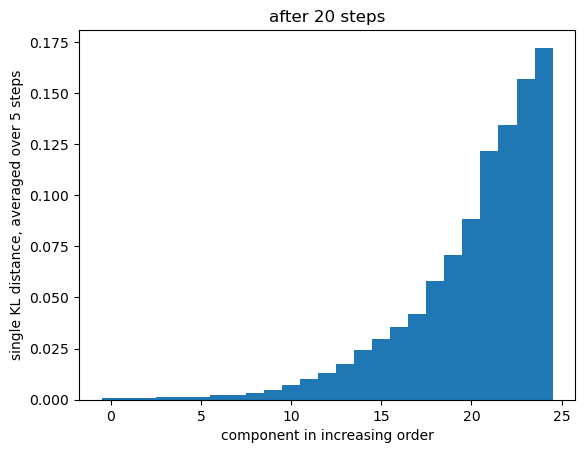

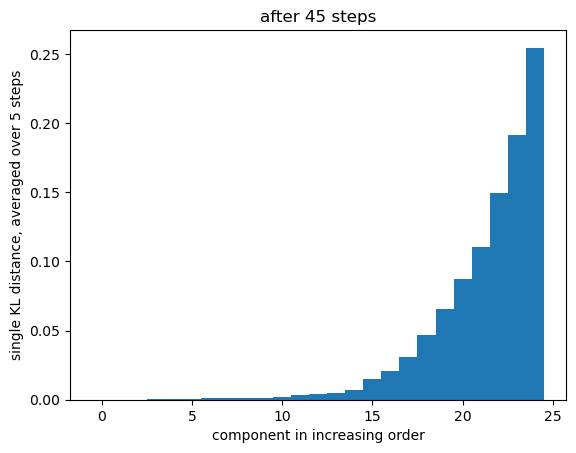

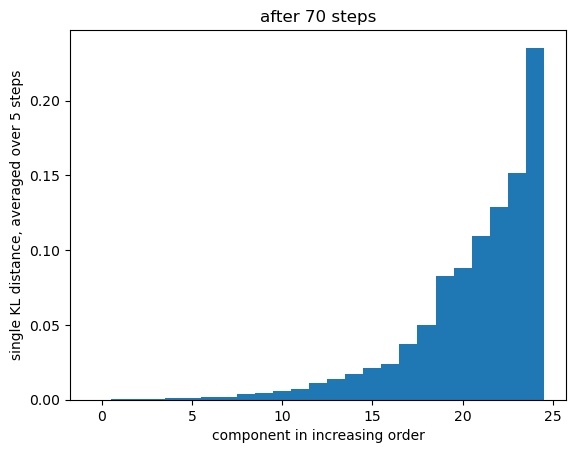

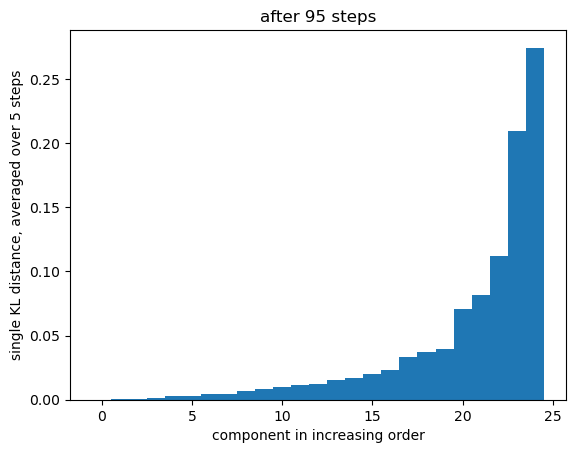

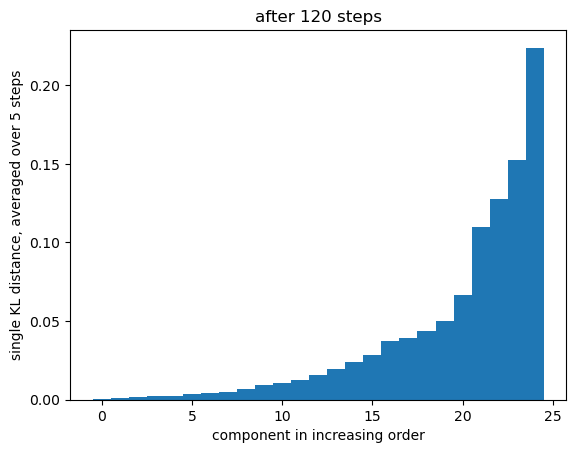

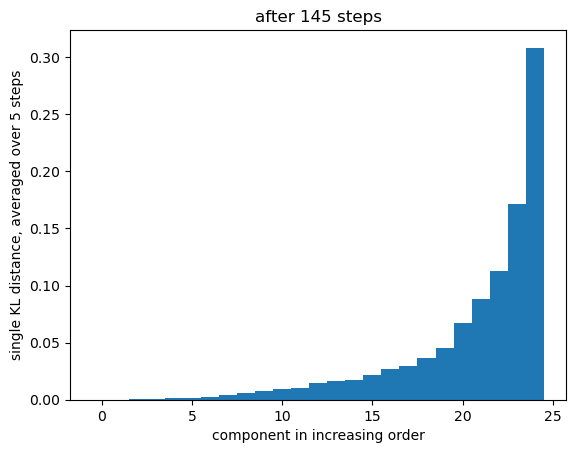

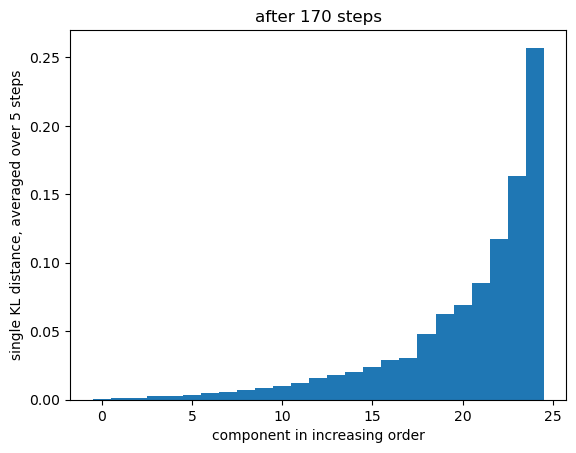

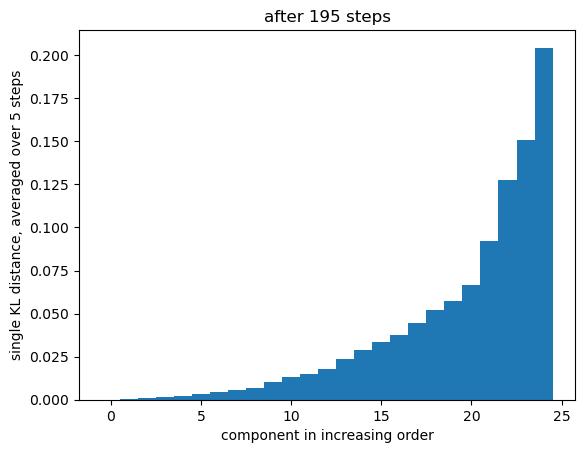

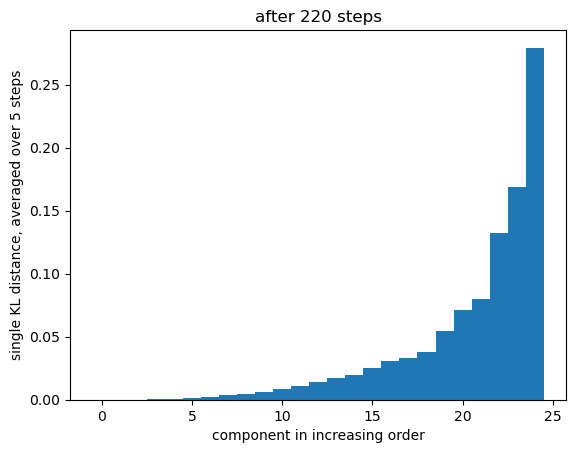

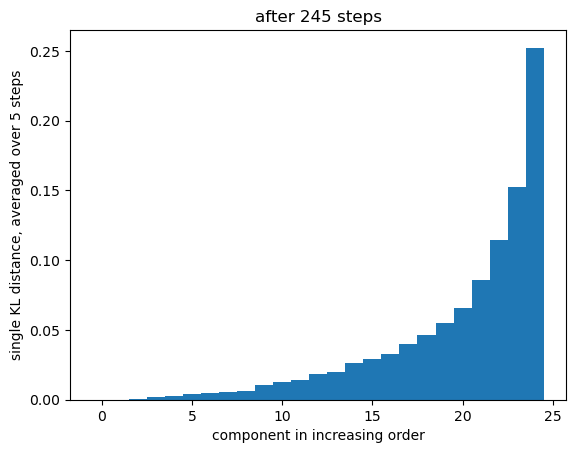

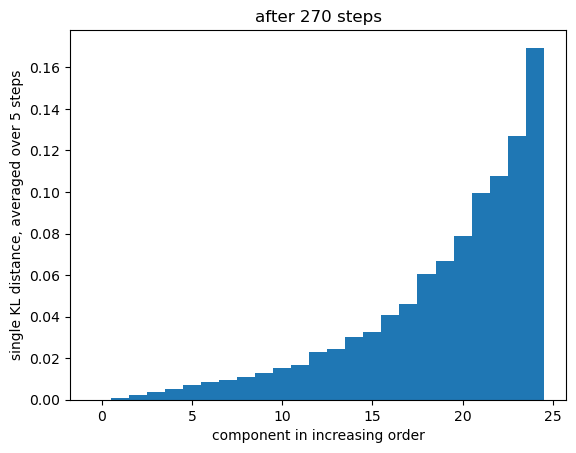

In [125]:
count = 20
for step in every_five_single_dkl:  
    
    ave = dkl_ave(step)
    plt.bar(range(0,25), ave, 1)
    plt.xlabel("component in increasing order")
    plt.ylabel("single KL distance, averaged over 5 steps")
    plt.title("after "+str(count)+" steps")
    count += 25
    plt.show()